<a href="https://colab.research.google.com/github/gabrielantonyxaviour/aptos-hack/blob/ML-model-to-predict-influencers-score-and-correlation-factor/ML_model_to_predict_influencers_score_and_correlation_factor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML MODEL

# Load Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving modified_influencers_data (1).csv to modified_influencers_data (1).csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['modified_influencers_data (1).csv']))
df

,Entity ID,Target Value,Date,Influencer ID,Account Handle,Platform,Follower Count,Likes,Comments,Views,Likes Made,Comments Made,Accounts Following,Engagement Rate,Influencer Score,Quality of Followers,Ad Products Sold,Usage Time,Likes per Day,Comments per Day
0,8,5.54,19281206,8,16,7,7628441,795916,47108,1954106,7802,4078,4509,0.3667,5.54,6,1188,14.91,634,29
1,8,6.29,19281213,8,16,7,7803355,915117,3517,4411510,4709,4899,4719,0.6831,6.29,3,4609,20.07,531,450
2,8,8.51,19281220,8,16,6,815542,406340,25907,225628,4438,619,3868,0.8067,8.51,3,2963,6.18,495,333
3,8,6.76,19281227,8,16,6,8701272,374808,23281,1601327,124,266,2658,0.2298,6.76,4,1921,6.83,580,444
4,8,3.84,19290103,8,16,6,4425703,302733,35915,2467272,7429,2720,4818,0.6340,3.84,6,4657,3.48,379,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8,8.55,20240829,8,16,9,9733886,986193,31444,1346888,6437,2821,1405,0.2429,8.55,4,1032,7.80,874,132
4996,8,4.58,20240905,8,16,6,6342088,117943,19166,2286361,569,3205,892,0.3821,4.58,3,4442,10.56,502,490
4997,8,3.88,20240912,8,16,7,4132234,686445,46719,2685686,4748,3432,4973,0.8274,3.88,3,2920,15.00,549,406
4998,8,6.18,20240919,8,16,6,2386280,878495,39951,1535863,4694,2356,912,1.0285,6.18,4,2488,13.46,82,224


# Data preperation

## Data seperation as X and Y

In [ ]:
y = df['Influencer Score']
y

,Influencer Score
0,5.54
1,6.29
2,8.51
3,6.76
4,3.84
...,...
4995,8.55
4996,4.58
4997,3.88
4998,6.18


In [ ]:
x = df.drop('Influencer Score',axis=1)
x

,Entity ID,Target Value,Date,Influencer ID,Account Handle,Platform,Follower Count,Likes,Comments,Views,Likes Made,Comments Made,Accounts Following,Engagement Rate,Quality of Followers,Ad Products Sold,Usage Time,Likes per Day,Comments per Day
0,8,5.54,19281206,8,16,7,7628441,795916,47108,1954106,7802,4078,4509,0.3667,6,1188,14.91,634,29
1,8,6.29,19281213,8,16,7,7803355,915117,3517,4411510,4709,4899,4719,0.6831,3,4609,20.07,531,450
2,8,8.51,19281220,8,16,6,815542,406340,25907,225628,4438,619,3868,0.8067,3,2963,6.18,495,333
3,8,6.76,19281227,8,16,6,8701272,374808,23281,1601327,124,266,2658,0.2298,4,1921,6.83,580,444
4,8,3.84,19290103,8,16,6,4425703,302733,35915,2467272,7429,2720,4818,0.6340,6,4657,3.48,379,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8,8.55,20240829,8,16,9,9733886,986193,31444,1346888,6437,2821,1405,0.2429,4,1032,7.80,874,132
4996,8,4.58,20240905,8,16,6,6342088,117943,19166,2286361,569,3205,892,0.3821,3,4442,10.56,502,490
4997,8,3.88,20240912,8,16,7,4132234,686445,46719,2685686,4748,3432,4973,0.8274,3,2920,15.00,549,406
4998,8,6.18,20240919,8,16,6,2386280,878495,39951,1535863,4694,2356,912,1.0285,4,2488,13.46,82,224


## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [ ]:
x_train

,Entity ID,Target Value,Date,Influencer ID,Account Handle,Platform,Follower Count,Likes,Comments,Views,Likes Made,Comments Made,Accounts Following,Engagement Rate,Quality of Followers,Ad Products Sold,Usage Time,Likes per Day,Comments per Day
4833,8,4.55,20210722,8,16,6,6818278,158622,33623,4641177,4272,2706,4241,0.7089,4,1328,10.12,305,101
1218,8,5.38,19520410,8,16,6,9162579,8445,45618,4871826,3197,1149,331,0.5376,4,779,17.09,909,359
135,8,5.81,19310709,8,16,9,5168997,517273,44304,1662883,8221,3256,739,0.4303,4,3906,5.62,588,80
3612,8,9.21,19980226,8,16,9,9967748,576570,35512,3258614,7020,3325,3913,0.3883,3,3569,5.59,894,50
3259,8,9.43,19910523,8,16,7,5862593,999852,40521,1540692,7744,2832,606,0.4403,3,4781,8.54,575,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,8,9.11,20080612,8,16,6,3550200,594809,30598,1393582,9367,2708,1418,0.5687,4,218,18.23,938,299
1890,8,8.85,19650225,8,16,6,8948833,744881,12181,843920,6864,677,2022,0.1789,4,3023,19.12,907,196
350,8,4.86,19350822,8,16,7,6931467,156470,17169,1151934,9270,4602,339,0.1912,3,4816,21.79,442,221
79,8,8.61,19300612,8,16,6,9532510,514151,34525,3915228,857,4820,707,0.4683,3,3689,13.39,886,62


In [ ]:
x_test

,Entity ID,Target Value,Date,Influencer ID,Account Handle,Platform,Follower Count,Likes,Comments,Views,Likes Made,Comments Made,Accounts Following,Engagement Rate,Quality of Followers,Ad Products Sold,Usage Time,Likes per Day,Comments per Day
789,8,9.42,19440120,8,16,9,3287232,446542,46247,4180144,9332,4102,1052,1.4215,4,435,1.90,174,338
2507,8,1.65,19761223,8,16,7,6795345,305471,47458,3882815,1871,2392,4260,0.6233,6,1432,13.99,701,429
2376,8,3.94,19740620,8,16,7,5854,211378,22807,2712574,1936,1764,3909,503.3753,4,864,8.24,50,448
1378,8,8.30,19550505,8,16,6,361476,780965,8504,1412764,698,552,803,6.0923,3,1504,14.96,385,481
598,8,8.48,19400523,8,16,7,4012037,251388,24511,4914130,1753,565,883,1.2936,6,2594,15.84,926,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,8,8.25,19560927,8,16,6,1565438,764377,48202,2562122,5788,59,2108,2.1558,3,2036,15.76,446,52
4921,8,5.43,20230330,8,16,7,3596854,602056,49955,1311403,6343,1687,2549,0.5459,3,399,22.86,525,310
3091,8,9.28,19880303,8,16,6,7716622,262206,37630,1630191,6572,916,3124,0.2501,4,3349,7.75,601,53
3683,8,2.77,19990708,8,16,7,7345818,307530,3175,1209859,7555,750,3330,0.2070,4,89,2.98,216,13


# **Model building**

## **Linear Regression**

### Traning model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Apply model to make prediction

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([4.55, 5.38, 5.81, ..., 4.86, 8.61, 3.34])

In [ ]:
y_lr_test_pred

array([ 9.42,  1.65,  3.94,  8.3 ,  8.48,  5.37,  5.71,  1.45,  9.94,
        6.55,  6.99,  9.56,  8.92,  3.72,  8.3 ,  2.12,  2.19,  7.3 ,
        3.92,  7.38,  1.55,  6.49,  6.84,  7.14,  8.02,  8.18,  8.33,
        9.13,  3.14,  9.18,  2.46, 10.  ,  7.63,  7.5 ,  8.96,  7.35,
        3.64,  6.13,  9.92,  6.35,  6.35,  4.4 ,  7.89,  8.91,  4.41,
        7.01,  3.99,  3.02,  9.61,  3.76,  5.2 ,  8.83,  4.15,  6.35,
        6.12,  1.73,  3.66,  5.61,  2.7 ,  2.6 ,  4.9 ,  3.96,  9.39,
        7.01,  3.92,  3.56,  4.74,  2.95,  1.88,  1.2 ,  7.68,  8.08,
        5.98,  9.75,  4.67,  5.87,  1.44,  8.79,  1.65,  8.63,  4.96,
        4.6 ,  9.79,  5.88,  6.41,  4.37,  8.68,  4.39,  1.41,  4.63,
        9.18,  2.18,  7.18,  8.3 ,  5.68,  2.13,  7.42,  3.32,  3.62,
        5.2 ,  7.59,  5.62,  8.8 ,  4.4 ,  2.44,  9.5 ,  8.03,  8.4 ,
        9.62,  2.48,  4.35,  7.3 ,  4.36,  6.9 ,  1.1 ,  1.23,  9.7 ,
        9.88,  7.45,  8.23,  4.  ,  6.23,  7.67,  5.53,  6.94,  1.86,
        3.91,  2.56,

###Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print("Linear Regression Model Performance:")
print("Training MSE:", lr_train_mse)
print("Training R2:", lr_train_r2)
print("Test MSE:", lr_test_mse)
print("Test R2:", lr_test_r2)

Linear Regression Model Performance:
Training MSE: 1.5895455538157697e-19
Training R2: 1.0
Test MSE: 1.4779215129751643e-19
Test R2: 1.0


In [ ]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Testing MSE','Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Test R2
0,Linear regression,0.0,1.0,0.0,1.0


## Random Forest

## Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluating Model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.385032,0.943516,0.3932,0.941497


## Model Comparison

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,0.0,1.0,0.0,1.0,NaN
1,Random forest,0.385032,0.943516,NaN,0.941497,0.3932


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Testing MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_4.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_5.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

<string>:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Testing MSE'].value_counts()
    for x_label, grp in _df_6.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Testing MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_7.groupby('Testing MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Testing MSE')
_ = plt.ylabel('Test R2')

In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,0.0,1.0,0.0,1.0,NaN
1,Random forest,0.385032,0.943516,NaN,0.941497,0.3932


from matplotlib import pyplot as plt
_df_8['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('Testing MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Method')):
  _plot_series(series, series_name, i)
  fig.legend(title='Method', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Training MSE')):
  _plot_series(series, series_name, i)
  fig.legend(title='Training MSE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Training R2')):
  _plot_series(series, series_name, i)
  fig.legend(title='Training R2', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Testing MSE')):
  _plot_series(series, series_name, i)
  fig.legend(title='Testing MSE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_17['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_18.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_19.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

<string>:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Testing MSE'].value_counts()
    for x_label, grp in _df_20.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Testing MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_21.groupby('Testing MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Testing MSE')
_ = plt.ylabel('Test R2')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Training MSE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='Training MSE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Training R2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='Training R2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Testing MSE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='Testing MSE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Data visualization of predicted result

Text(0.5, 0, 'Experimental Score')

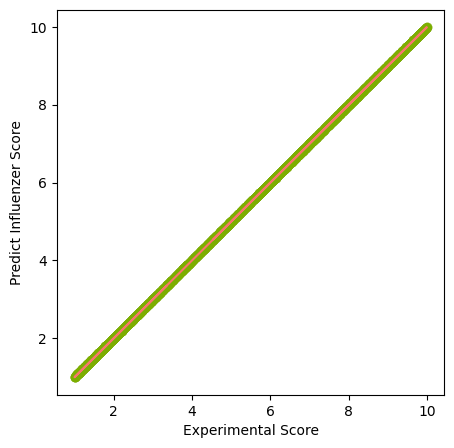

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predict Influenzer Score')
plt.xlabel('Experimental Score')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame containing the data

# Separate features (x) and target (y)
y = df['Influencer Score']
x = df.drop('Influencer Score', axis=1)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# To predict the 'Influencer Score' for new data, use:
# new_data_predictions = model.predict(new_data)

Mean Squared Error: 1.4779215129751643e-19
R-squared: 1.0


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'Influencer Score' with other parameters
influencer_score_corr = correlation_matrix['Influencer Score']

# Print the correlations
print(influencer_score_corr)

# You can also sort the correlations in descending order:
sorted_corr = influencer_score_corr.sort_values(ascending=False)
print(sorted_corr)

Entity ID                    NaN
Target Value            1.000000
Date                   -0.025421
Influencer ID                NaN
Account Handle               NaN
Platform                0.018752
Follower Count         -0.010988
Likes                  -0.024741
Comments               -0.030275
Views                  -0.010949
Likes Made             -0.011688
Comments Made           0.012377
Accounts Following     -0.035293
Engagement Rate         0.010129
Influencer Score        1.000000
Quality of Followers   -0.022851
Ad Products Sold        0.001726
Usage Time             -0.021450
Likes per Day           0.009292
Comments per Day        0.022932
Name: Influencer Score, dtype: float64
Target Value            1.000000
Influencer Score        1.000000
Comments per Day        0.022932
Platform                0.018752
Comments Made           0.012377
Engagement Rate         0.010129
Likes per Day           0.009292
Ad Products Sold        0.001726
Views                  -0.010949
Foll

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Parameters")
plt.show()

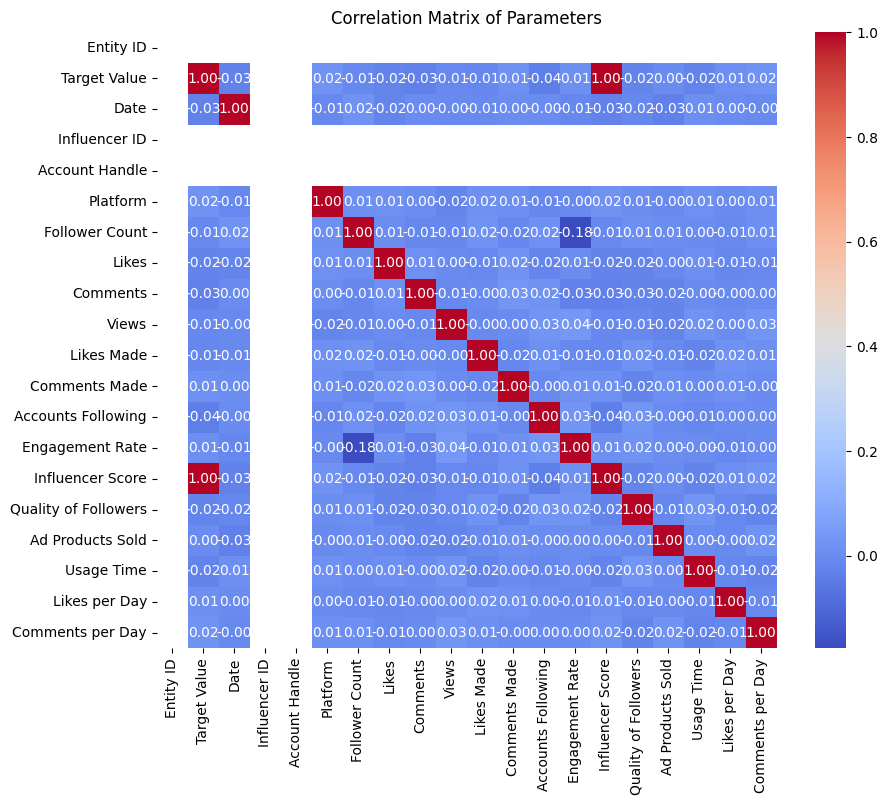

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Parameters")
plt.show()